In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


(42000, 785) (28000, 784)


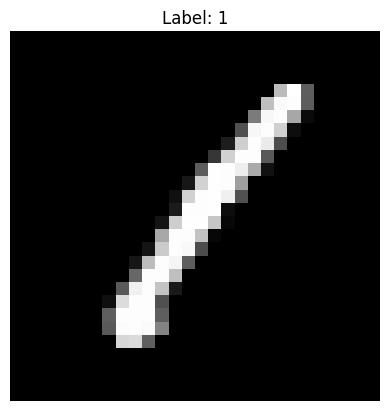

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Accuracy: 0.9782539682539683

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       620
           1       0.99      0.99      0.99       703
           2       0.98      0.99      0.98       627
           3       0.97      0.97      0.97       653
           4       0.99      0.97      0.98       611
           5       0.97      0.95      0.96       569
           6       0.99      1.00      0.99       620
           7       0.99      0.98      0.99       660
           8       0.98      0.97      0.97       609
           9       0.94      0.98      0.96       628

    accuracy                           0.98      6300
   macro avg       0.98      0.98      0.98      6300
weighted avg       0.98      0.98      0.98      6300



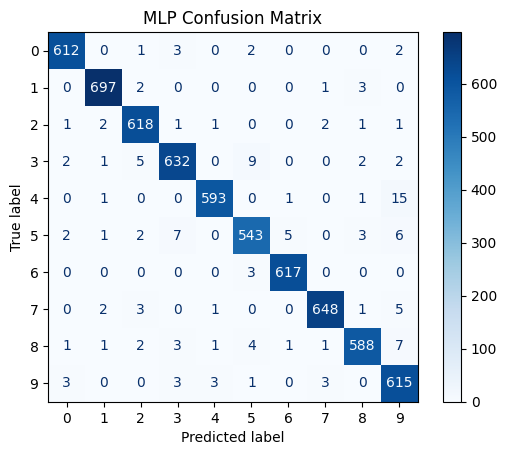

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Saved /kaggle/working/submission.csv


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [2]:
# ========= 1) Imports =========
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

DATA = "/kaggle/input/digit-recognizer"

# ========= 2) Load =========
train = pd.read_csv(f"{DATA}/train.csv")
test  = pd.read_csv(f"{DATA}/test.csv")

print(train.shape, test.shape)   # (42000, 785) (28000, 784)

# ========= 3) Split features/labels & scale to [0,1] =========
y = train["label"].values
X = train.drop(columns=["label"]).astype("float32").values / 255.0
X_test_final = test.astype("float32").values / 255.0

# 可視化一張看看（可選）
sample = X[0].reshape(28,28)
plt.imshow(sample, cmap="gray"); plt.title(f"Label: {y[0]}"); plt.axis("off"); plt.show()

# ========= 4) Train/Valid Split =========
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# ========= 5) MLP model =========
mlp = MLPClassifier(
    hidden_layer_sizes=(256,128),
    activation="relu",
    solver="adam",
    batch_size=128,
    max_iter=20,
    random_state=42,
    verbose=False
)

mlp.fit(X_tr, y_tr)

# ========= 6) Evaluate =========
pred = mlp.predict(X_va)
acc = accuracy_score(y_va, pred)
print("Validation Accuracy:", acc)
print("\nClassification report:\n", classification_report(y_va, pred))

cm = confusion_matrix(y_va, pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues"); plt.title("MLP Confusion Matrix"); plt.show()

# ========= 7) Train on full & Submit =========
mlp.fit(X, y)
test_pred = mlp.predict(X_test_final)

submission = pd.DataFrame({"ImageId": np.arange(1, len(test_pred)+1),
                           "Label": test_pred})
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("✅ Saved /kaggle/working/submission.csv")
submission.head()


(42000, 785) (28000, 784)
Validation Accuracy: 0.975873

Classification report:
               precision    recall  f1-score   support

           0     0.9791    0.9839    0.9815       620
           1     0.9901    0.9915    0.9908       703
           2     0.9793    0.9825    0.9809       627
           3     0.9676    0.9617    0.9647       653
           4     0.9834    0.9705    0.9769       611
           5     0.9695    0.9508    0.9601       569
           6     0.9856    0.9952    0.9904       620
           7     0.9863    0.9848    0.9856       660
           8     0.9687    0.9655    0.9671       609
           9     0.9470    0.9682    0.9575       628

    accuracy                         0.9759      6300
   macro avg     0.9757    0.9755    0.9755      6300
weighted avg     0.9759    0.9759    0.9759      6300



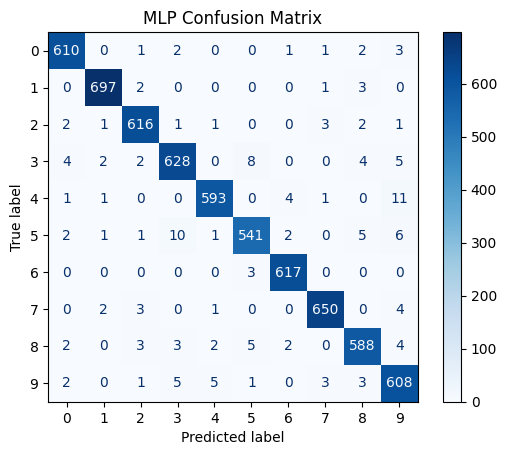

✅ Saved /kaggle/working/submission.csv


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [3]:
# ========= 1) Imports & CPU-only =========
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"   # 強制關 GPU 掃描，消除 CUDA 警告

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

DATA = "/kaggle/input/digit-recognizer"
RANDOM_STATE = 42

# ========= 2) Load =========
train = pd.read_csv(f"{DATA}/train.csv")
test  = pd.read_csv(f"{DATA}/test.csv")
print(train.shape, test.shape)   # (42000, 785) (28000, 784)

# ========= 3) Split features/labels & scale to [0,1] =========
y = train["label"].values
X = train.drop(columns=["label"]).astype("float32").values / 255.0
X_test_final = test.astype("float32").values / 255.0

# （可選）快速看一張圖，跑快的話可註解掉
# sample = X[0].reshape(28,28)
# plt.imshow(sample, cmap="gray"); plt.title(f"Label: {y[0]}"); plt.axis("off"); plt.show()

# ========= 4) Train/Valid Split =========
X_tr, X_va, y_tr, y_va = train_test_split(
    X, y, test_size=0.15, random_state=RANDOM_STATE, stratify=y
)

# ========= 5) MLP model (帶 early stopping) =========
# 重點：把 max_iter 拉高，交給 early_stopping 控制；把 batch_size 稍放大讓 CPU 更有效率
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,   # 比預設 0.001 透明標示
    alpha=1e-4,                # L2 正則，避免過擬合
    batch_size=256,            # CPU 通常 256 跑得不錯；記憶體不夠可改回 128
    max_iter=300,              # 提高上限，交由 early_stopping 控制實際迭代數
    early_stopping=True,       # 啟用早停（會自動切出 10% 當 validation）
    validation_fraction=0.1,   # 內部驗證比例
    n_iter_no_change=15,       # 15 個 epoch 都不進步就停
    tol=1e-4,                  # 進步閾值
    shuffle=True,
    random_state=RANDOM_STATE,
    verbose=False
)

# 用你自己的外部驗證（X_va, y_va）觀察分數；訓練時 early_stopping 會用內部的 10% 驗證
mlp.fit(X_tr, y_tr)

# ========= 6) Evaluate on our held-out valid =========
pred = mlp.predict(X_va)
acc = accuracy_score(y_va, pred)
print(f"Validation Accuracy: {acc:.6f}")
print("\nClassification report:\n", classification_report(y_va, pred, digits=4))

# （可選）混淆矩陣，若想跑更快可註解
cm = confusion_matrix(y_va, pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues"); plt.title("MLP Confusion Matrix"); plt.show()

# ========= 7) Refit on FULL data for submission =========
# 技巧：用剛才訓練實際跑到的迭代數 (mlp.n_iter_) 當作 full-data 的 max_iter，通常更穩
best_iters = getattr(mlp, "n_iter_", 100)
best_iters = int(best_iters) if isinstance(best_iters, (int, np.integer)) else 100
best_iters = max(50, best_iters + 10)   # 保险：至少 50，再多給 10 個迭代緩衝

mlp_full = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,
    alpha=1e-4,
    batch_size=256,
    max_iter=best_iters,       # 用剛剛觀察到的實際迭代數重訓
    early_stopping=False,      # 全資料訓練不再切驗證
    shuffle=True,
    random_state=RANDOM_STATE,
    verbose=False
)

mlp_full.fit(X, y)

# ========= 8) Predict test & Submit =========
test_pred = mlp_full.predict(X_test_final)
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(test_pred)+1),
    "Label": test_pred
})
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("✅ Saved /kaggle/working/submission.csv")
submission.head()

